# Amplitude Modulation vs Ringmodulation




Both amplitude modulation and ringmodulation are 
a multiplication of two signals.
The basic formula is the same for both:

$y[n] = x[n] \cdot m[n]$


However, for ringmodulation the modulation signal is symmetric:

$y[n] = \sin\left(2 \pi f_c \frac{n}{f_s}\right) \cdot \left(\sin\left[2 \pi f_m \frac{n}{f_s}\right]\right)$

Whereas for amplitude modulation, the signal ist asymetric:

$y[n] = \sin\left(2 \pi f_c \frac{n}{f_s}\right) \cdot \left( 1+ \sin\left[2 \pi f_m \frac{n}{f_s}\right]\right)$

This differnce has an influence on the resulting spectrum and on the sound,
as the following examples show.


In [1]:
# import relevant packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import signal
from IPython.display import display, Markdown, clear_output
import IPython.display as ipd

from ipywidgets import *

# define functions for AM and ringmod

def am(f1, f2, t):
    
    x = np.sin(2*np.pi*f1*t)
    m = 1+np.sin(2*np.pi*f2*t)

    y = x*m    
    return(y,m,x)



def ringmod(f1, f2, t):
    
    x = np.sin(2*np.pi*f1*t)
    m = np.sin(2*np.pi*f2*t)

    y = x*m    
    return(y,m,x)


In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## AM Spectrum


The spectrum for amplitude modulation can 
be calculated as follows:

$Y[k] = DFT(y[n])$

$\displaystyle Y[k] =  \sum_{n=0}^{N-1} y[n] \cdot e^{-j 2 \pi k \frac{n}{N}}$
 
$\displaystyle =   \sum_{n=0}^{N-1} \sin\left(2 \pi f_c \frac{n}{f_s}\right) \cdot \left( 1+ \sin\left[2 \pi f_m \frac{n}{f_s}\right]\right)   \cdot e^{-j 2 \pi k \frac{n}{N}}$
     
    - with: $$
     
$\displaystyle =\sum_{n=0}^{N-1} \left( \sin\left(2 \pi f_c \frac{n}{f_s}\right) + 0.5 \left( \cos\left(2 \pi (f_c - f_m)\frac{n}{f_s}\right)  - \cos\left(2 \pi (f_1 + f_m)\frac{n}{f_s}\right)  \right) \right)  \cdot e^{-j 2 \pi k \frac{n}{N}}$

$\displaystyle= \delta[f_1] + 0.5 \delta[f_c - f_m] + 0.5 \ \delta[f_c + f_m]$

AM creates a spectrum with a peak at the carrier frequency and 
two peaks below and above it. 
Their position is defined by the difference between carrier and modulator.
 

<IPython.core.display.Javascript object>


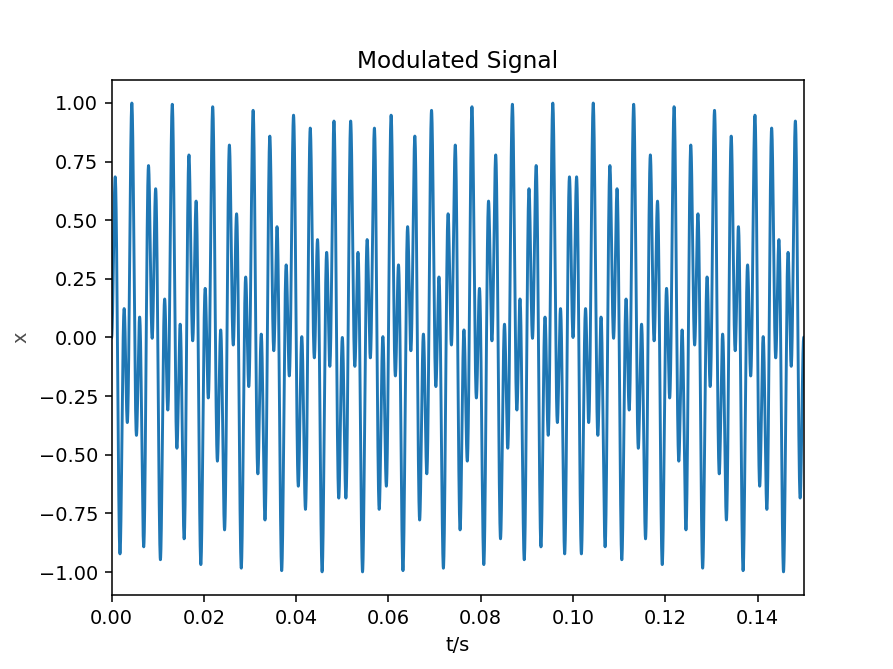

interactive(children=(IntSlider(value=170, description='f_mod', max=1000, min=1), IntSlider(value=400, descrip…

In [2]:
# visualization in the time domain

# basic parameters
fs = 48000
L  = 48000

t  = np.linspace(0,1,L)
f  = np.linspace(-0.5,0.5,L)


f_car = 400
f_mod = 170
[x, x_car, x_sig] = ringmod(f_mod, f_car, t)
 

fig1, ax1 = plt.subplots()
 
plt.title("Modulated Signal")

ax1.set_xlabel('t/s')
ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(0, 0.15) 

ipd.display(ipd.Audio(x, rate=fs))

line, = ax1.plot(t,x);

def update( f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=170),
            f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=400)):  
    
    [x, x_car, x_sig] = ringmod(f_mod, f_car, t)
 
    
    line.set_ydata(x)
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update); 


<IPython.core.display.Javascript object>


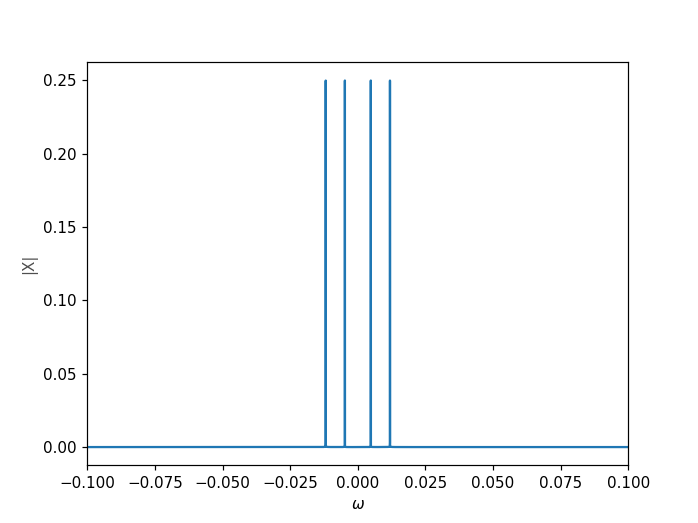

interactive(children=(IntSlider(value=170, description='f_mod', max=1000, min=1), IntSlider(value=400, descrip…

In [4]:
# visualization in the frequency domain

f_car = 400
f_mod = 170
[x, x_car, x_sig] = ringmod(f_mod, f_car, t)

# fft stuff   
X = np.fft.fftshift(np.fft.fft(x))
X = X/(L)

X_car = np.fft.fftshift(np.fft.fft(x_car))
X_car = X_car/(L)

X_sig = np.fft.fftshift(np.fft.fft(x_sig))
X_sig = X_sig/(L)


fig1, ax1 = plt.subplots()
 
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('|X|' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(-0.1, 0.1) 

# for static HTML output:
line, = ax1.plot(f,abs(X));
ipd.display(ipd.Audio(x, rate=fs))

# for interactive output:
def update(  f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=170),
             f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=400)):  
    
    [x, x_car, x_sig] = ringmod(f_mod, f_car, t)

 
    X = np.fft.fftshift(np.fft.fft(x))
    X = X/(L)

    X_car = np.fft.fftshift(np.fft.fft(x_car))
    X_car = X_car/(L)

    X_sig = np.fft.fftshift(np.fft.fft(x_sig))
    X_sig = X_sig/(L)

    line.set_ydata(abs(X))
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update);   



## Ringmod Spectrum

 
$\mathcal{F} [ y(t)]  =  \int\limits_{-\inf}^{\inf} y(t) e^{-j 2 \pi f t} \mathrm{d}t$

$=  \int\limits_{-\inf}^{\inf} \left( \sin(2 \pi f_c t) \sin(2 \pi f_s t) \right) e^{-j 2 \pi f t} \mathrm{d}t$

$= \frac{1}{2 j} \int\limits_{-\inf}^{\inf} \left( (-e^{-j 2 \pi f_c t} +e^{j 2 \pi f_c t})  (-e^{-j 2 \pi f_s t} +e^{j 2 \pi f_s t}) \right) \ e^{-j 2 \pi f t} \mathrm{d}t$

$= \frac{1}{2 j}  \int\limits_{-\inf}^{\inf} \left(  e^{j 2 \pi (f_c+f_s) t}
 - e^{j 2 \pi (f_c-f_s) t}
 - e^{j 2 \pi (-f_c+f_s) t}
+ e^{j 2 \pi (-f_c-f_s) t}  
  \right) e^{-j 2 \pi f t}$
  
$= \frac{1}{2 j} \left[ \delta(f_c+f_s)   -\delta(f_c-f_s) 
  - \delta(-f_c+f_s)  
   + \delta(-f_c-f_s)  
    \right]$
    
    
    
Ringmodulation creates a spectrum with  
two peaks below and above the carrier frequency. 
Their position is defined by the difference between carrier and modulator.    
The modulator is supressed, since it is symmetric.


<IPython.core.display.Javascript object>


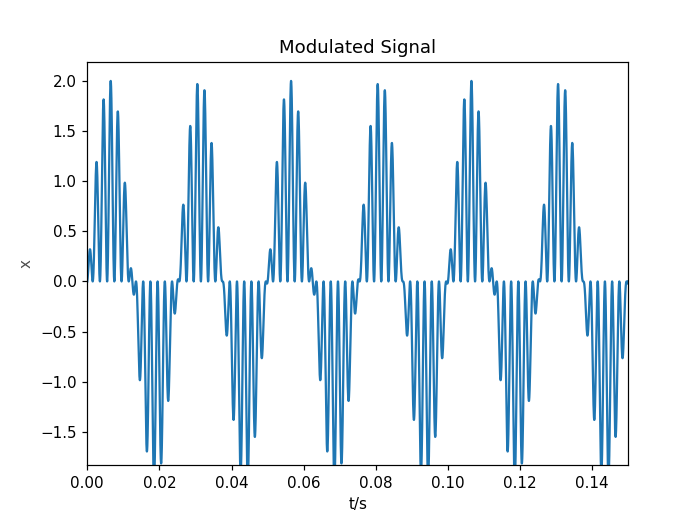

interactive(children=(IntSlider(value=40, description='f_mod', max=1000, min=1), IntSlider(value=500, descript…

In [5]:
# visualization in the time domain

# basic parameters
fs = 48000
L  = 48000

t  = np.linspace(0,1,L)
f  = np.linspace(-0.5,0.5,L)


f_car = 500
f_mod = 100
[x, x_car, x_sig] = am(f_mod, f_car, t)
 

fig1, ax1 = plt.subplots()
 
plt.title("Modulated Signal")

ax1.set_xlabel('t/s')
ax1.set_ylabel('x' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(0, 0.15) 

ipd.display(ipd.Audio(x, rate=fs))

line, = ax1.plot(t,x);

def update( f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=40),
            f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=500)):  
    
    [x, x_car, x_sig] = am(f_mod, f_car, t)
 
    
    line.set_ydata(x)
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update); 


<IPython.core.display.Javascript object>


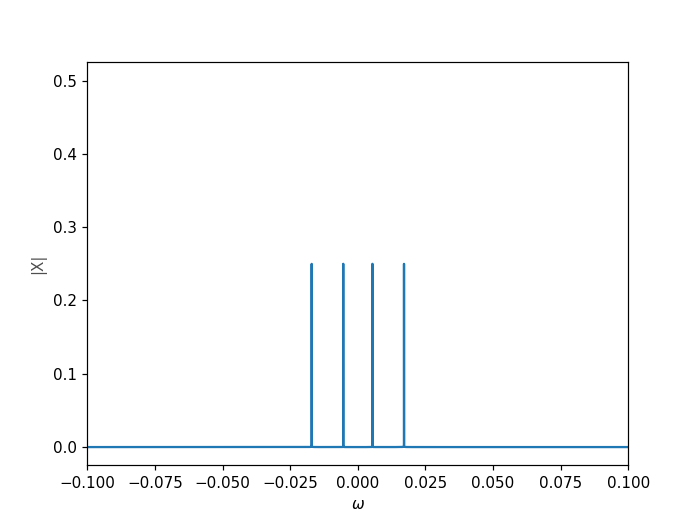

interactive(children=(IntSlider(value=400, description='f_mod', max=1000, min=1), IntSlider(value=170, descrip…

In [6]:
# visualization in the frequency domain

f_car = 400
f_mod = 170
[x, x_car, x_sig] = am(f_mod, f_car, t)

# fft stuff   
X = np.fft.fftshift(np.fft.fft(x))
X = X/(L)

X_car = np.fft.fftshift(np.fft.fft(x_car))
X_car = X_car/(L)

X_sig = np.fft.fftshift(np.fft.fft(x_sig))
X_sig = X_sig/(L)


fig1, ax1 = plt.subplots()
 
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('|X|' ,color = [ 0.3, 0.3, 0.3])
ax1.set_xlim(-0.1, 0.1) 

# for static HTML output:
line, = ax1.plot(f,abs(X));
ipd.display(ipd.Audio(x, rate=fs))

# for interactive output:
def update(  f_mod = widgets.IntSlider(min = 1, max= 1000, step=1, value=400),
             f_car = widgets.IntSlider(min = 1, max= 1000, step=1, value=170)):  
    
    [x, x_car, x_sig] = am(f_mod, f_car, t)

 
    X = np.fft.fftshift(np.fft.fft(x))
    X = X/(L)

    X_car = np.fft.fftshift(np.fft.fft(x_car))
    X_car = X_car/(L)

    X_sig = np.fft.fftshift(np.fft.fft(x_sig))
    X_sig = X_sig/(L)

    line.set_ydata(abs(X))
    fig1.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
interact(update);   

